In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob

from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier

In [8]:

# Constants
NORMAL = 0
INTERICTAL = 1
ICTAL = 2

# Creating file_list for data
data_path = "C:\\Users\\camer\\Desktop\\Neurovigil\\EEG_Data\\"
folder_names = ['Z_normal', 'O_normal', 'N_interictal', 
                'F_interictal', 'S_ictal']
state_label = [NORMAL]*200 + [INTERICTAL]*200 + [ICTAL]*100
label_list = [data_path + "Z_normal" + "\\*.txt",
             data_path + "O_normal" + "\\*.txt",
             data_path + "N_interictal" + "\\*.txt",
             data_path + "F_interictal" + "\\*.txt",
             data_path + "S_ictal" + "\\*.txt"]
file_list = []
for label in label_list:
    file_list += glob.glob(label)
# Pulling data
data = [[]]*500
i = 0
for file in file_list:
    arr = open(file).read()
    data[i] = ([int(x) for x in arr.split()])
    i += 1
data = np.array(data)

In [9]:
# Variable/data organization
x = data
y = state_label
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2,
                                                    random_state=0)

In [10]:
# Create, train, test an SVC Model
def svc_model(x_train, y_train, x_test, y_test):
    classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
    classifier.fit(x_train, y_train)
    y_test_preds = classifier.predict(x_test)

    fpr, tpr, roc_auc = roc_auc_calc(n_classes, y_test, y_test_preds)
    plot_roc(fpr, tpr, roc_auc, 'Receiver Operating Characteristic: SVC Model')

In [11]:
# Create, train, test a Decision Tree Model
def decision_tree_model(x_train, y_train, x_test, y_test):
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(x_train, y_train)
    y_test_preds = decision_tree.predict(x_test)
    
    fpr, tpr, roc_auc = roc_auc_calc(n_classes, y_test, y_test_preds)
    plot_roc(fpr, tpr, roc_auc, 'Receiver Operating Characteristic: Decision Tree Model')

In [12]:
# Compute ROC curve and ROC area for a general model
def roc_auc_calc(n_classes, y_test, y_test_preds):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_test_preds[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    return fpr, tpr, roc_auc

In [13]:
# Plot an ROC curve
def plot_roc(fpr, tpr, roc_auc, graph_title):
    #Plotting ROC curve for SVC Model
    plt.figure()
    lw = 2
    plt.plot(fpr[2], tpr[2], color='red',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(graph_title)
    plt.legend(loc="upper left")
    plt.show()

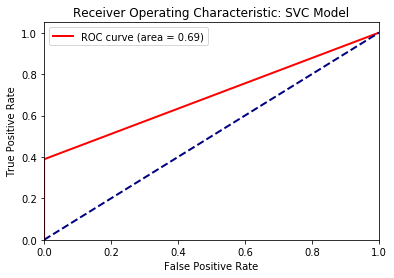

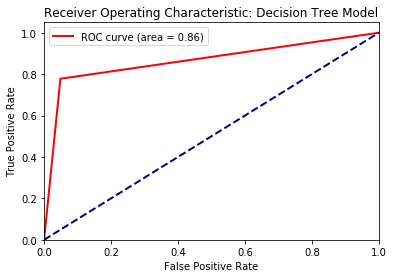

In [14]:
svc_model(x_train, y_train, x_test, y_test)
decision_tree_model(x_train, y_train, x_test, y_test)